# Perdicting Penguin Species with Machine Learning
By: Group 20 Renzo, Jennifer, Issac 

In this project we will be implementing various machine learning models on the Palmer Penguins data set to predict the species of a penguin based on some of its features. We will begin by exploring the data and analyzing it to select features that are critical to identifying and predicting penguin species. Then we will train three machine learning models and evaluate each of their performance on the data.

## Group Contributions Statement

 - Renzo led our exploritory analysis and figures/decision graphs
 - Jennifer led our disscusion and commentary
 - Isaac led our models and cross-validation
 
 Together we reviewed and edited the final notebook and gave input to the others when needed

## Exploratory Analysis

In this section we will introduce the Palmer Penguins data set and compute summary statistics and construct data visualizations to further understand the data. Our goal here is to understand the features that are critical to predicting penguin species. We aim to find such features through our analysis.

### I. Importing Data

In [1]:
import urllib
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
url = 'https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'

# Grab the data and parse it
filedata = urllib.request.urlopen(url) 

# Write to file
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())
    
penguins = pd.read_csv('penguins.csv')

### II. Preparing the data

First let's inspect the raw penguins dataframe to understand the data we are working with.

In [3]:
# View size of dataframe
penguins.shape

(344, 17)

In [4]:
# Inspect the data frame
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


As we can see the penguins dataframe is a fairly small data set. However, before we begin our analysis we want to clean our data so that it will be easier to read. The `Species` column names are long and complicated, so for simplicity we will convert the `Species` column to just the name of the species. We recode the `Sex` columns to standardize the sex of the penguins and convert **NaN** values to a string. We are also only interested in particular quantitative and qualitative features so we remove columns that are not necessary for our analysis. 
Certain qualitiative columns such as `Sample Number` and `studyName` do not provide us with valuable information so we can drop these. Other columns, such as shown below with the `.unique()` function, are also not necessary because they only contain one value which does not provide any additional information about the penguins. We can drop these as well.

In [5]:
# View categorical columns that are not necessary
penguins["Region"].unique(), penguins["Stage"].unique()

(array(['Anvers'], dtype=object), array(['Adult, 1 Egg Stage'], dtype=object))

In [6]:
# Simplify 'Species' name to just the species
penguins["Species"] = penguins["Species"].str.split().str.get(0)

# Recode Sex names
recode = {"MALE"   : "M",
          "FEMALE" : "F",
          "."      : "Unknown",
          np.nan   : "Unknown"}
penguins["Sex"] = penguins["Sex"].map(recode)

# Remvove unnecessary columns 
penguins = penguins.drop(["studyName", 
                          "Sample Number", 
                          "Region", "Stage", 
                          "Individual ID", 
                          "Clutch Completion",
                          "Date Egg", 
                          "Comments"], axis = 1)

We are interested in the species of the penguins so we take a closer look by finding the unique names that lie in the `Species` column.

In [7]:
# Find the unique values of the Species column
penguins['Species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### III. Plots and tables

We now know that there are three unique penguin species that we want to predict. Using the parsed penguins dataframe above we want to find the "best" predictors, or features that are most useful in predicting the unique species. We start exploring the data with a table of summary statistics. Since we are interested in the species, we will subset the dataframe using the `groupby()` method. This allows the summary statistics to be computed based on the individual species. We are also interested in seeing the summary statistics for each species further broken down by the qualitative columns of `Sex` and `Island`. We keep the unknown penguins under `Sex` since we have yet to determine whether or not sex is a valuable feature, so their data may be important later on.

In [8]:
# Summary table by species and sex
penguins.groupby(["Species", "Sex"]).aggregate([np.mean, np.std])

Culmen Length (mm)           Culmen Depth (mm)            \
                                mean       std              mean       std   
Species   Sex                                                                
Adelie    F                37.257534  2.028883         17.621918  0.942993   
          M                40.390411  2.277131         19.072603  1.018886   
          Unknown          37.840000  2.802320         18.320000  1.269646   
Chinstrap F                46.573529  3.108669         17.588235  0.781128   
          M                51.094118  1.564558         19.252941  0.761273   
Gentoo    F                45.563793  2.051247         14.237931  0.540249   
          M                49.473770  2.720594         15.718033  0.741060   
          Unknown          45.625000  1.374470         14.550000  0.810350   

                  Flipper Length (mm)           Body Mass (g)              \
                                 mean       std          mean         std   
Species   Sex                                                               
Adelie    F                187.794521  5.595035   3368.835616  269.380102   
          M                192.410959  6.599317   4043.493151  346.811553   
          Unknown          185.600000  6.107373   3540.000000  477.166114   
Chinstrap F                191.735294  5.754096   3527.205882  285.333912   
          M                199.911765  5.976558   3938.970588  362.137550   
Gentoo    F                212.706897  3.897856   4679.741379  281.578294   
          M                221.540984  5.673252   5484.836066  313.158596   
          Unknown          215.750000  1.258306   4587.500000  338.193731   

                  Delta 15 N (o/oo)           Delta 13 C (o/oo)            
                               mean       std              mean       std  
Species   Sex                                                              
Adelie    F                8.793275  0.475914        -25.794158  0.613175  
          M                8.928437  0.362755        -25.833813  0.562443  
          Unknown          8.883025  0.354395        -25.153415  0.084478  
Chinstrap F                9.250962  0.322040        -24.565405  0.241078  
          M                9.464535  0.386763        -24.527679  0.238612  
Gentoo    F                8.193405  0.279057        -26.197205  0.534377  
          M                8.303429  0.245151        -26.170608  0.554716  
          Unknown          8.127007  0.145815        -26.232992  0.459308

In [9]:
# Summary table by species and island
penguins.groupby(["Species", "Island"]).aggregate([np.mean, np.std])

Culmen Length (mm)           Culmen Depth (mm)            \
                                  mean       std              mean       std   
Species   Island                                                               
Adelie    Biscoe             38.975000  2.480916         18.370455  1.188820   
          Dream              38.501786  2.465359         18.251786  1.133617   
          Torgersen          38.950980  3.025318         18.429412  1.339447   
Chinstrap Dream              48.833824  3.339256         18.420588  1.135395   
Gentoo    Biscoe             47.504878  3.081857         14.982114  0.981220   

                    Flipper Length (mm)           Body Mass (g)              \
                                   mean       std          mean         std   
Species   Island                                                              
Adelie    Biscoe             188.795455  6.729247   3709.659091  487.733722   
          Dream              189.732143  6.585083   3688.392857  455.146437   
          Torgersen          191.196078  6.232238   3706.372549  445.107940   
Chinstrap Dream              195.823529  7.131894   3733.088235  384.335081   
Gentoo    Biscoe             217.186992  6.484976   5076.016260  504.116237   

                    Delta 15 N (o/oo)           Delta 13 C (o/oo)            
                                 mean       std              mean       std  
Species   Island                                                             
Adelie    Biscoe             8.823593  0.382470        -25.918702  0.546280  
          Dream              8.948276  0.422908        -25.747446  0.597462  
          Torgersen          8.792753  0.461072        -25.757806  0.613419  
Chinstrap Dream              9.356155  0.368720        -24.546542  0.238809  
Gentoo    Biscoe             8.245338  0.264470        -26.185298  0.538554

Based on the tables above we can make several initial observations:

- In regards to their quantitative features, female penguins have smaller measurements compared to their male counterparts across the board
- The only penguins living on Torgersen are Adelies
- Adelie penguins live on all three islands
- Chinstrap penguins only live on the island of Dream
- Gentoo penguins only live on the island of Biscoe
- Chinstrap and Gentoo penguins have significantly longer culmen's compared to Adelies
- Gentoo's have shallower culmens, longer flippers, and weigh more than the other two species

These observations give us several insights. For one they hint that the `Island` on which a penguin lives may have a significant indication about their species. Secondly, Gentoo penguins seem to be much larger than Adelie and Chinstrap penguins, indicating that the quantitative features such as `Body Mass (g)` and `Culmen Length (mm)` may also be valuable for our models. To explore this relationship further, we proceed to visualize the data with histograms. Thse first histogram displays the data for each quantitative feature subsetted by penguin species.

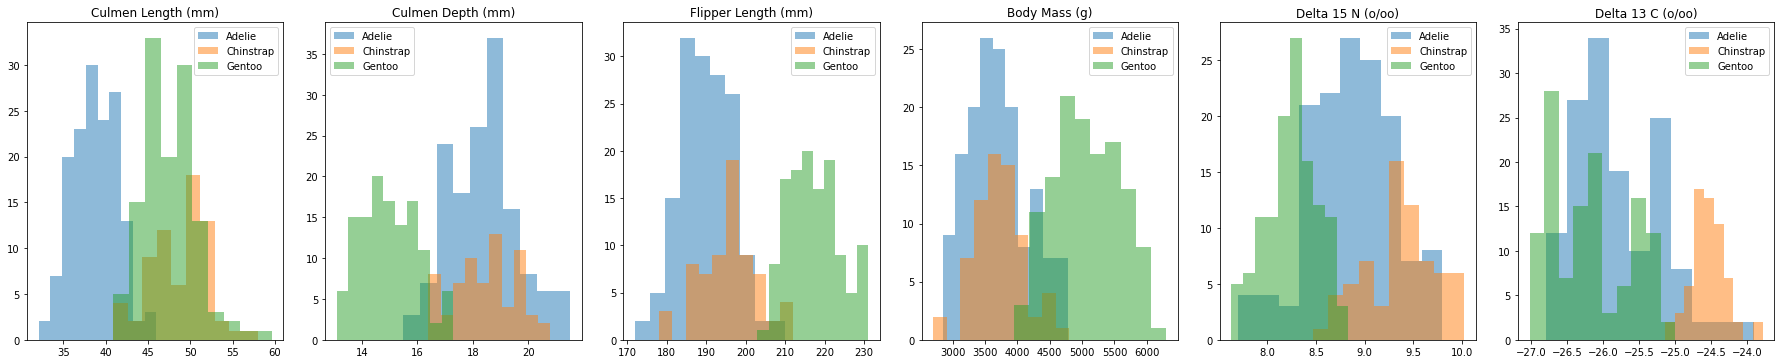

In [10]:
# List containing labels for quantitative variables
quant_cols = ["Culmen Length (mm)", 
        "Culmen Depth (mm)",
        "Flipper Length (mm)",
        "Body Mass (g)",
        "Delta 15 N (o/oo)",
        "Delta 13 C (o/oo)"]

fig, ax = plt.subplots(1, len(quant_cols), figsize =  (25, 5))

def plot_hist(df, colname, index):
    """
    This simple plot function plots histograms based on:
    df = dataframe
    colname = column name of quantitative variable
    index = Index indicating which subplot to plot on
    """
    ax[index].hist(df[colname], alpha = 0.5, label = df['Species'])
    ax[index].set(title = colname)
    ax[index].legend()
    
# Fit plots  
fig.tight_layout()

# Iterate over the list of quantitative variables to plot each one
for i in range(len(quant_cols)):
    penguins.groupby(['Species']).apply(plot_hist, quant_cols[i], i)

This figure visualizes some of the observations made earlier: Adelies have short culmens, Gentoo have shallow culmens, Gentoo are heavier and have long flippers. This reinforces the idea that quantitative features like `Culmen Length (mm)` and `Body Mass (g)` may be strong predictors of penguin species. This figure, however, does not consider any qualitative variables such as `Sex` or `Island`. Thus, we are still interested in exploring this area of the data. The next figure will display the relationship between the sexes of each species and their relationship to the quantitative features. We leave the unknown sexes in the data as we have yet to determine whether or not `Sex` is an important feature.

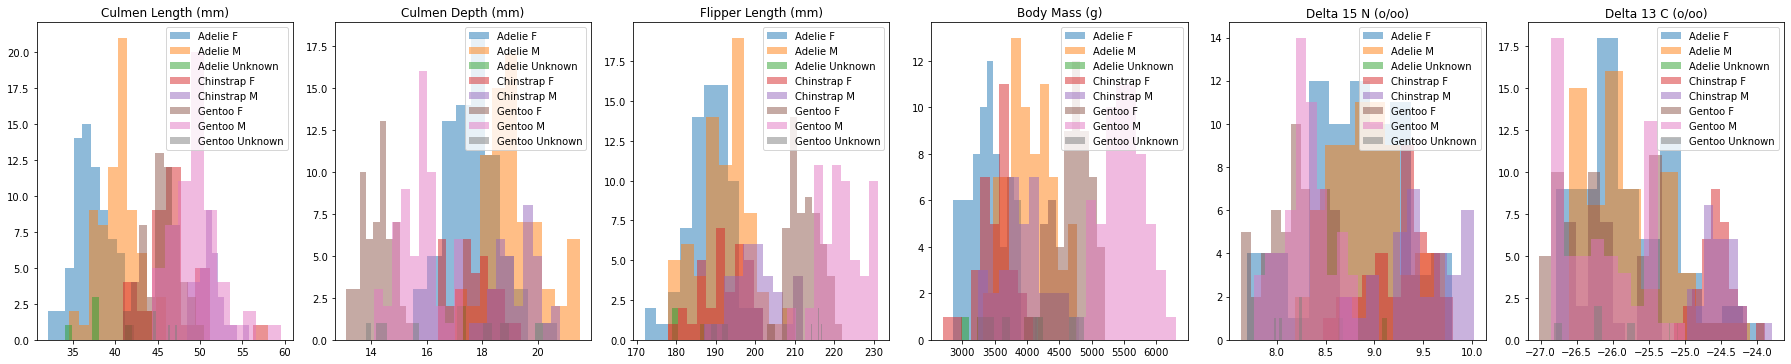

In [11]:
fig, ax = plt.subplots(1, len(quant_cols), figsize =  (25, 5))

def plot_hist(df, colname, index):
    """
    This simple plot function plots histograms based on:
    df = dataframe
    colname = column name of quantitative variable
    index = Index indicating which subplot to plot on
    """
    ax[index].hist(df[colname], alpha = 0.5, label = df['Species'] + ' ' + df['Sex'])
    ax[index].set(title = colname)
    ax[index].legend()
    
# Fit plots 
fig.tight_layout()

# Iterate over the list of quantitative variables to plot each one
for i in range(len(quant_cols)):
    penguins.groupby(['Species', 'Sex']).apply(plot_hist, quant_cols[i], i)

As mentioned above the female penguins tend to have smaller numbers around their quantitative features comapred to the males in their species. This figure supports this idea, showing the exact split in the data between the sexes of each penguin. Yet, the histograms appear to have the same shape as the previous figure. This means that there is no new information introduced by subsetting the data by sex. We finally examine the data by island with a bar chart. 

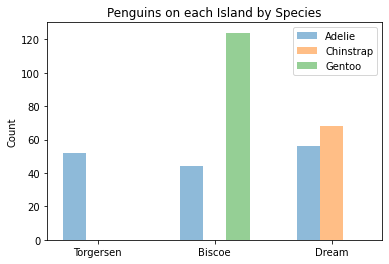

In [12]:
fig, ax = plt.subplots(1)

# Names of each island
island_labels = list(penguins['Island'].unique())
# Names of each species
species_labels = list(penguins['Species'].unique())
# List to be filled with the count of each penguins in each island by species
species_per_island = []
# Iterate over species and island
for j in range(len(species_labels)):
    for i in range(len(island_labels)):
        species_per_island.append(len(penguins[(penguins["Species"] == species_labels[j] ) & (penguins["Island"] == island_labels[i])]))
    
# Set label locations
x = np.arange(len(island_labels))
# Set width of the bins
width = 0.2

# Plot the first three elements of species_per_island which correspond to Adelie
group1 = ax.bar(x - width, species_per_island[:3], width, label = species_labels[0], alpha = 0.5)
# Plot the 3rd through 5th elements of species_per_island which correspond to the Chinstrap
group2 = ax.bar(x, species_per_island[3:6], width, label = species_labels[1], alpha = 0.5)
# Plot the last three elements of species_per_island which correspond to Gentoo
group3 = ax.bar(x + width, species_per_island[6:], width, label = species_labels[2], alpha = 0.5)

# Set tiltle of plot
ax.set(title = "Penguins on each Island by Species", ylabel = "Count")
# Set the x ticks to match the label locations 
ax.set_xticks(x)
# Set x ticks as the names of the islands
ax.set_xticklabels(island_labels)
ax.legend()

As this bar chart shows Adelies live on all three islands, Gentoos live on Biscoe, and Chinstraps only live on Dream. This supports the observations we made from the summary charts earlier. This result is significant because it indicates that knowing the island of a penguin has a significant impact on what its species is and is likely an important feature for classification. We now have a better idea of what features are valuable predictors and want a systematized way to select them for the models. We seek to find one qualitative feature and two quantitative features as we want to be able to visualize the decision boundaries and regions of our models later on. We use a manual feature selection process to find such features.

### IV. Feature Selection

In this section we will perform a manual feature selction process to find one qualitative and two quantitative features that we will implement for our models. The code below performs the following:

1. Drop all rows containing NaN values for computation
2. Recode qualitative variables with integers
3. Subset predictor variables and target variable
4. Find all possible combinations of three predictor variables using the combinations package from itertools
5. Compute cross-validation scores for logistic regression fit on predictors and target variables (Cross-validation and logistic regression will be explained in detail in modeling section) 
6. Rank the combinations by cross-validation scores

We want a copy of the penguins dataframe in order to drop all rows containing NaN values. This is necessary for our successive computations. We make a copy to preserve the original dataframe. 

In [13]:
# Import preprocessing, logistic regression, cross-validation, and combinations
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from itertools import combinations

# Create a copy of the penguins df
penguins_nadrop = penguins.copy()
# Drop rows with NaN values
penguins_nadrop = penguins_nadrop.dropna()

# Recode all qualitative variables
le = preprocessing.LabelEncoder()
penguins_nadrop['Island'] = le.fit_transform(penguins_nadrop['Island'])
penguins_nadrop['Species'] = le.fit_transform(penguins_nadrop['Species'])
penguins_nadrop['Sex'] = le.fit_transform(penguins_nadrop['Sex'])

# Split data into predictor and target variables
X = penguins_nadrop.drop(['Species'], axis = 1)
y = penguins_nadrop['Species']

# Create a logistic regression model
LR = LogisticRegression(solver = "liblinear")

# Compute all combinations of three variables
comb = combinations(X, 3)   
# Save a numpy array of all combinations
all_combinations = np.array(list(comb))

# Empty list to be filled with the feature combinations and associated cross-validation score
cv_score = []
# Iterate over all combinations and append each combination and cross-validation score to list
for i in range(len(all_combinations)):
    cv_score.append((list(all_combinations[i]), cross_val_score(LR, X[list(all_combinations[i])], y, cv = 10 ).mean()))

# Inspect list (first five entries)
cv_score[:5]

[(['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'], 0.9636363636363636),
 (['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'], 0.8727272727272727),
 (['Island', 'Culmen Length (mm)', 'Body Mass (g)'], 0.8606060606060606),
 (['Island', 'Culmen Length (mm)', 'Sex'], 0.8242424242424242),
 (['Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'], 0.906060606060606)]

The cv_score list contains all combinations of three predictor variables and their cross-validation socres. We rank the list in order to find the strongest predictors, and we also manually inspect the ranked results to find the combination with our desired two quantitative and one qualitative features.

In [14]:
sorted(cv_score, key = lambda x : x[1], reverse=True)[:10]

[(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)'],
  0.9848484848484848),
 (['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
  0.9787878787878789),
 (['Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
  0.9727272727272727),
 (['Culmen Length (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
  0.9696969696969695),
 (['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'], 0.9636363636363636),
 (['Culmen Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
  0.9575757575757576),
 (['Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'], 0.9545454545454547),
 (['Culmen Length (mm)', 'Culmen Depth (mm)', 'Sex'], 0.9545454545454545),
 (['Culmen Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
  0.9515151515151515),
 (['Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
  0.9393939393939394)]

At a score of 0.964, `Island`, `Culmen Length (mm)`, and `Culmen Depth` are the first three features that contain our criteria of a combination with two quantitative and one qualitative variables. Some of these variables were similarly identified as potential predictors in the plots and table portion of our exploratory analysis. This feature selection confirms our earlier observations, and thus, these three features will be used in our following machine learning models. 

## Modeling

We will implement three kinds of models in this project:   
`Decision Tree`: Predictive modeling approach    
`svm.SVC`: Support Vector Classification  
`multinomial LogisticRegression`:  Classification method that generalizes logistic regression to multiclass problems

### 0. Subsetting important data 

From our feature selection, we determined `Island`, `Culmen Length (mm)`, `Culmen Depth (mm)` as our predictor variables. Hence, we subset our data to only include the columns we are interested in.

In [15]:
# Columns we will keep
cols = ["Species", "Culmen Length (mm)", "Culmen Depth (mm)", "Island"]
# Update dataframe with new columns and drop rows with nan values
data = penguins[cols]
data = data.dropna()
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Island
0,Adelie,39.1,18.7,Torgersen
1,Adelie,39.5,17.4,Torgersen
2,Adelie,40.3,18.0,Torgersen
4,Adelie,36.7,19.3,Torgersen
5,Adelie,39.3,20.6,Torgersen


Here is a snapshot of the data we will use later in our models.

Before splitting our data into training and testing data for our model, we set a random seed to ensure that the random values the code generates will be the same everytime it is run. This is so that our evaluations and explanations of our models are consistent with the model outputs.

In [16]:
np.random.seed(1234)

We will use the `train_test_split` from the `sklearn` module to split the raw data into two sets: training set and testing set. We split the data accordingly in order to have a set of  data which will be used to train our models and a set of data which will be used to determine the accuracy of our models and to deem necessary adjustments to our model’s parameters. The `train_test_split` function thus allows us to separate the data into a train set and test set.  The `test_size` argument allows us to split our training and testing data at the proportion 70 : 30.

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Predictor variables 
X = data.drop(["Species"], axis = 1)
# Target variable
y = data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Machine learning algorithms are not able to "understand" text data. We need to transform the text data into numberical inputs so that our models can read and learn on it.

In [18]:
def data_cleaner(X, y):
    '''
    This function clean and transform the data  
    in order to prepare well for machine learning
    ----------------
    parameter:
    X: predictor data
    y: target data
    ----------------
    return:
    X_new.values: cleaned X
    y_new: cleaned y
    X_new.columns: the label of cleaned X
    '''
    
    #copy a new one
    X_new = X.copy()
    y_new = y.copy()
    
    #encode the non-number cols data,
    #in order for machine to learn(know) what it is.
    le = preprocessing.LabelEncoder()
    X_new["Island"] = le.fit_transform(X_new["Island"])
    y_new = le.fit_transform(y_new)
    return X_new.values, y_new, X_new.columns

X_train, y_train, train_labels = data_cleaner(X_train, y_train)
X_test, y_test, test_labels = data_cleaner(X_test, y_test)

#also set up the dict to record orginal value of species and island
species_dict = {0:"Adelie", 1:"Chinstrap", 2:"Gentoo"}
island_dict = {0:"Biscoe", 1:"Dream", 2:"Torgersen"}

Now, all the data is cleaned and prepared and we can start modeling!

### I. Decision Tree Model

The Decision tree is a machine learning model that separates data into several subsets. It will start the separation with a binary split and continue until splits can no longer be made. The parameter `max_depth` indicates the maximum depth of the tree. As the `max_depth` increases, the complexity level of the model will also increase.   

Since we are predicting the species of penguins based on three variables, the decision tree will allow us to classify the penguins very efficiently. We start the model training process by examining the output with a max depth of 3. 

In [19]:
# Import tree
from sklearn import tree
T = tree.DecisionTreeClassifier(max_depth = 3) 
# Fit training data
T.fit(X_train, y_train)
# Score model on train and test set
T.score(X_train, y_train), T.score(X_test, y_test)

(0.9916317991631799, 0.9805825242718447)

The scores appear to be very strong on both the train and test set with a slight edge on the training data. While the model is better on the training data, there does not appear to be a strong indication of overfitting so we continue our analysis by examining the output with a max depth of 20.

In [20]:
T = tree.DecisionTreeClassifier(max_depth = 20) 
T.fit(X_train, y_train)
T.score(X_train, y_train), T.score(X_test, y_test)

(1.0, 0.9805825242718447)

When the `max_depth` is set to 20, the model gets a perfect score on the training set (this means all of the model's predictions match the target) and it performs the same on the test set as before. While the scores do not appear to change drastically from a depth of 3, this is a sign of overfitting.
In order to determine the optimal depth, we proceed with a method called `cross-validation`.

#### (1) Cross-Validation

`Cross validation` is a process by which a machine learning model is trained and evaluated on a set of limited data. This process is repeated by shuffling the portions of the data that the model is trained on. By performing this process we can arrive to an optimal `max_depth` parameter for our Decision tree model as well as deal with bias that may be present from the train test split we performed earlier. This is a powerful tool to avoid overfitting (overfitting: a phenomenon where a model focuses too much on predicting the target exactly, while ignoring the "big direction" of data. When a model is overfit, it can be inaccurate when handling new test data). Now, we iterate over a range of depths to find the 'best' depth.  

[Text(0, 0.5, 'CV Score'),
 Text(0.5, 0, 'Depth'),
 Text(0.5, 1.0, 'Best Depth : 4')]

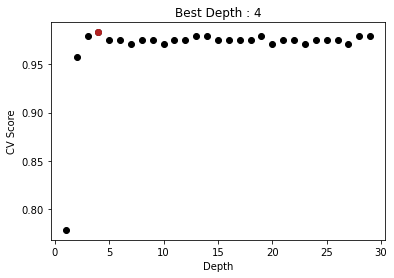

In [21]:
#set up the fig and ax
fig1, ax1 = plt.subplots(1)

#set up the default value for score and depth
best_tree_score = 0

#using for loop to find the best depth
for d in range(1,30):
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, X_train, y_train, cv=10).mean()
    ax1.scatter(d, cv_score, color = "black")
    if cv_score > best_tree_score:
        best_depth = d
        best_tree_score = cv_score
        
ax1.scatter(best_depth, best_tree_score, color = "firebrick")
        
ax1.set(title = "Best Depth : " + str(best_depth),
        xlabel = "Depth",
        ylabel = "CV Score")

From the scatter plot above, we can see that CV-score is maximized when the `max_depth` is `4`. Thus, we will choose this as the parameter value to train our model. Finally, we fit our model using our new value.

In [22]:
T1 = tree.DecisionTreeClassifier(max_depth = best_depth)
T1.fit(X_train, y_train)
T1.score(X_train, y_train), T1.score(X_test, y_test)

(0.99581589958159, 0.9805825242718447)

This time it appears that the score on the training data went down, however, the score on the test data remains unchanged. This is a result of the particular seed we set earlier. Overall, we can conclude that this is less of an overfit model than before that sill preserves a high score on the test data. We can visualize our Decision tree below with the following diagram.

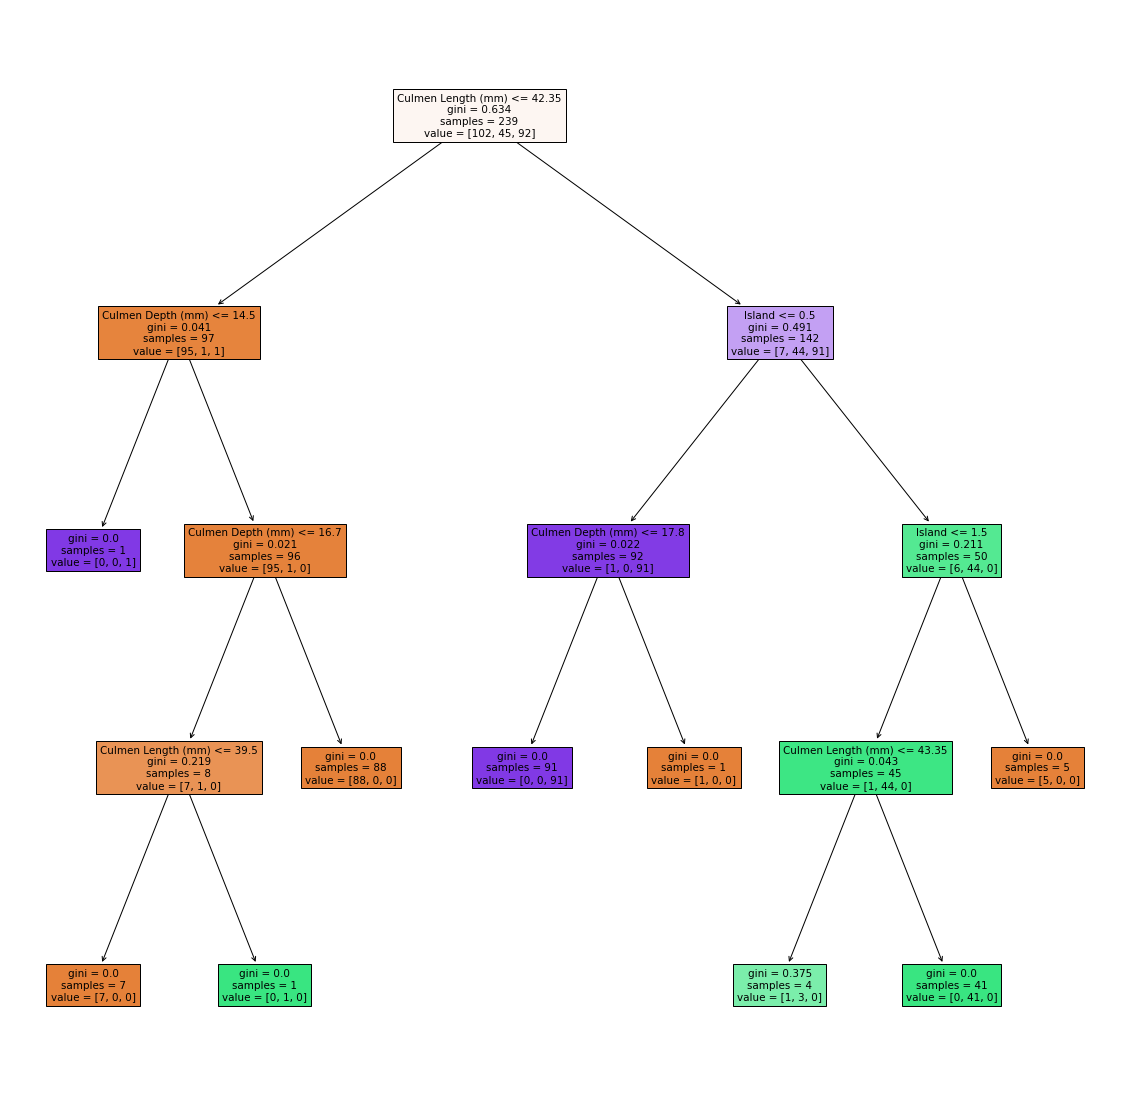

In [23]:
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T1, filled = True, feature_names = test_labels)

From this plot, we can easily understand how the decision tree works to classify a penguins's species. At each node the model evaluates one variable and makes a binary split. The depth of the model corresponds to how many levels of splits there are.

#### (2) Evaluating mistakes

Evaluating the mistakes of a model is an important process of machine learning, as we should always seek to understand why the mistakes happend and try to improve on them in the future.  To visualize our mistakes, we will use a powerful tool from `sklearn.metrics` called `consufion_matrix`. The `consufion_matrix` tool builds a confusion matrix which visualizes the predictions against the truth data in a matrix. Inside the matrix, the ( i , j )-th entry gives the number of times that the model predicts data as "i" when it should be "j".

In [24]:
from sklearn.metrics import confusion_matrix

#set up confusion model
T1.fit(X_train, y_train)
y1_test_pred = T1.predict(X_test)
c1 = confusion_matrix(y_test, y1_test_pred)
print(c1)

# find the mistakes, 
# and choose some right example to compare
mistakes1 = X_test[y_test != y1_test_pred]
mistake1_labels = y_test[y_test != y1_test_pred]
mistake1_preds = y1_test_pred[y_test != y1_test_pred]

#print them out with dict method 

print("")
print("Mistakes: " + str(len(mistakes1)))
print("")
#use for loop to show the mistakes table
for i in range(len(mistakes1)):
    print(i+1)
    print("Predict: " + str(species_dict[mistake1_preds[i]]) + 
          ", True: " + str(species_dict[mistake1_labels[i]]))
    for j in range(len(test_labels)-1):
        print(str(test_labels[j]) + ": " + str(mistakes1[i, j]))
    print(str(test_labels[2]) + ": " + str(island_dict[mistakes1[i, 2]]))
    print("-------------------------")
    print("")

[[48  1  0]
 [ 0 23  0]
 [ 0  1 30]]

Mistakes: 2

1
Predict: Chinstrap, True: Gentoo
Culmen Length (mm): 41.7
Culmen Depth (mm): 14.7
Island: Biscoe
-------------------------

2
Predict: Chinstrap, True: Adelie
Culmen Length (mm): 44.1
Culmen Depth (mm): 19.7
Island: Dream
-------------------------



From the confusion matrix, we can see that the model made two mistakes on an Adelie penguin from Dream and a Gentoo penguin from Biscoe (the model predicts that they are both Chinstrap penguins). Let's recall the true data of the Adelie and Gentoo penguins and compare it to Chinstraps:

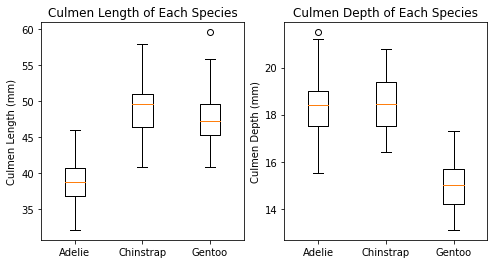

In [25]:
fig_mistake1, ax = plt.subplots(1,2, figsize = (8,4))
# Adelie Culmen measurements
Adelie_cl = data[data["Species"] == "Adelie"]["Culmen Length (mm)"].values
Adelie_cd = data[data["Species"] == "Adelie"]["Culmen Depth (mm)"].values
# Chinstrap Culmen measurements
Chinstrap_cl = data[data["Species"] == "Chinstrap"]["Culmen Length (mm)"].values
Chinstrap_cd = data[data["Species"] == "Chinstrap"]["Culmen Depth (mm)"].values
# Gentoo Culmen measurements
Gentoo_cl = data[data["Species"] == "Gentoo"]["Culmen Length (mm)"].values
Gentoo_cd = data[data["Species"] == "Gentoo"]["Culmen Depth (mm)"].values
# Aggregate lists
data_cl = [Adelie_cl, Chinstrap_cl, Gentoo_cl]
data_cd = [Adelie_cd, Chinstrap_cd, Gentoo_cd]
# Plot a boxplot for length
l = ax[0].boxplot(data_cl)
l = ax[0].set(ylabel = "Culmen Length (mm)", title = "Culmen Length of Each Species")
l = ax[0].set_xticks([1,2,3])
l = ax[0].set_xticklabels(["Adelie", "Chinstrap", "Gentoo"])
# Plot a boxplot for depth
k = ax[1].boxplot(data_cd)
k = ax[1].set(ylabel = "Culmen Depth (mm)", title = "Culmen Depth of Each Species")
k = ax[1].set_xticks([1,2,3])
k = ax[1].set_xticklabels(["Adelie", "Chinstrap", "Gentoo"])

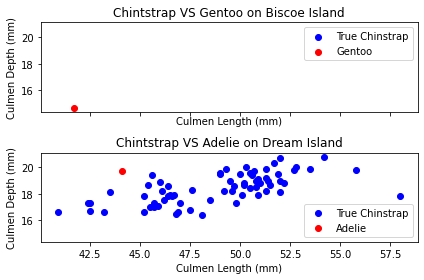

In [26]:
# scatter the true data and mistakes together to compare.
Chinstrap_Dream_data = penguins[(penguins["Species"] == "Chinstrap") & (penguins["Island"] == "Dream")]
Chinstrap_Biscoe_data = penguins[(penguins["Species"] == "Chinstrap") & (penguins["Island"] == "Biscoe")]

fig, ax = plt.subplots(2, sharey = True, sharex = True)
plt.tight_layout()

ax[0].scatter(Chinstrap_Biscoe_data["Culmen Length (mm)"], Chinstrap_Biscoe_data["Culmen Depth (mm)"], color = "blue", label = "True Chinstrap")

ax[0].scatter(41.7, 14.7, color = "red", label = "Gentoo")
ax[0].set(title = "Chintstrap VS Gentoo on Biscoe Island", ylabel = "Culmen Depth (mm)", xlabel = "Culmen Length (mm)")
ax[0].legend()

ax[1].scatter(Chinstrap_Dream_data["Culmen Length (mm)"], Chinstrap_Dream_data["Culmen Depth (mm)"], color = "blue", label = "True Chinstrap")
ax[1].scatter(44.1, 19.7, color = "red", label = "Adelie")
ax[1].set(title = "Chintstrap VS Adelie on Dream Island", xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")
ax[1].legend()

fig.tight_layout()

1. The first mistake on the Gentoo penguin is an odd case. While the Gentoo's culmen depth of 14.7 mm is within the range of other Gentoos, it has an unusually short culmen length at 41.7 mm that is in the range of Adelies. This can be easily identified in the box plots. Furthermore, there are no Chinstraps on Gentoo indicating this particular prediction likely did not consider the island. It can be inferred that this penguin simply has unusual measurements that were not correctly captured by the decision tree's splits, resulting in it being predicted as a Chinstrap.


2. The second mistake that the model makes on the Adelie penguin may be due to both its culmen depth and culmen length of 44.1 mm and 19.7 mm (the Adelie's measurments look like a Chinstrap penguin as it can be seen in the box plots). These kinds of mistakes happen because of the existence of outliers or anomalies. In our next models we seek to improve on this.

#### (3) Plotting the decision regions

Having examined the mistakes of the model, a plot of the decision region of the decision tree model will help visualize the model's behavior as well as identify where the mistakes were made. To acheive this we import a powewrful tool from `mlxtend` called `plot_decision_regions`. Jupyter notebooks does not have this module so the directions outlined [here](http://rasbt.github.io/mlxtend/installation/) were followed. 

However, before we plot the decision regions, we will import another tool from `mpl_toolkits.mplot3d` called `Axes3D` to plot a 3D plot of our test data to undertand how the data is split up. This is essential because a 3D plot will visualize the three features we are using to make predictions. A 2D plot of the decision regions considers two features, and cannot fully visualize the three features without either reducing the dimensions of the three features or by ignoring one of the features. By viewing the 3D plot we can then take cross sections along the `Island` axis to view the test data placed over the decision region by each island. 

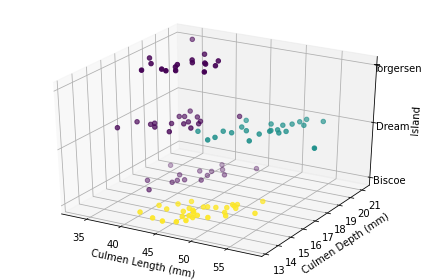

In [27]:
# Import Axes3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of Culmen length, Culmen, depth, and Island
ax.scatter(X_test[:,0], 
           X_test[:,1], 
           X_test[:,2], 
           s = 20, c = y_test, depthshade = True)

# Set axis labels for all 3 axes
ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('Culmen Depth (mm)')
ax.set_zlabel('Island')

# Change Z-axis ticks to island names
z = ["Biscoe", "Dream", "Torgersen"]
l = [0, 1, 2]
ax.set_zticks(l)
ax.set_zticklabels(z)

# Adjust view of figure
fig.tight_layout()


From this 3D plot, we can see how the test data is split up by the 3 features and now we seek to see the test data plotted over the decision regions by each island. We take a cross-section along the `Island` axis to do this. Using `plot_decision_regions` we can visualize the decision regions of our model. 

The following information about the function's parameters is conducive to understanding how the function works: The `filler_feature_values` is a dictionary of feature index-value pairs for the feature not being plotted. As mentioned above, the function plots based on two features, which in our case are `Culmen Length (mm)` and `Culmen Depth (mm)`. Therefore, the `filler_feature_values` argument indicates that the `Island` feature is not plotted and specifies what value it should take. For each iteration of our loop, the argument will take a differet value representing each island. In this way we can plot the test values over the decision regions by Island.

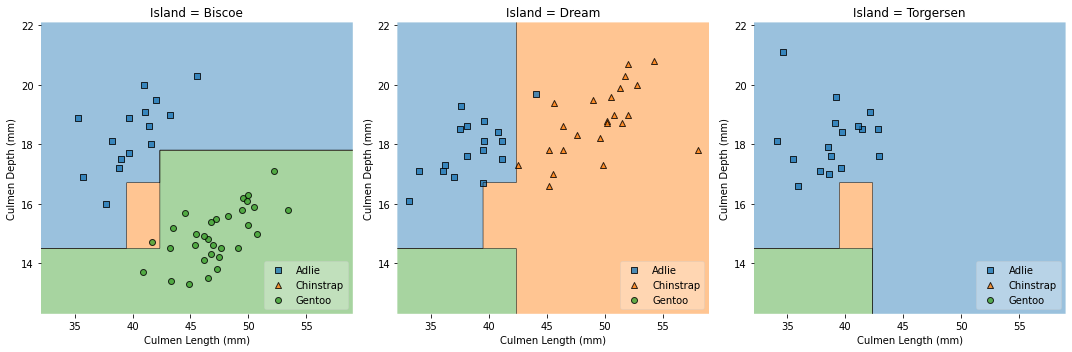

In [28]:
# Import plot deicision regions
from mlxtend.plotting import plot_decision_regions

# Create figure and plots
fig, ax = plt.subplots(1,3, figsize = (15,5),sharex = True, sharey = True)

# Values for each island
values = [0, 1.0, 2.0]
width = 0.75

#Plot decision regions
for i in range(len(values)):
    plot_decision_regions(X_test, y_test, clf = T1,
                          filler_feature_values = {2: values[i]},
                          filler_feature_ranges = {2: width},
                          ax = ax[i])
    ax[i].set_xlabel('Culmen Length (mm)')
    ax[i].set_ylabel('Culmen Depth (mm)')
    ax[i].set_title('Island = ' + str(island_dict[values[i]]))
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, ['Adlie', 'Chinstrap', 'Gentoo'], framealpha=0.3, loc=4)
    
fig.tight_layout()

One mistake is seen on the Biscoe plot and the second mistake is seen on the Dream plot.

### II. SVC Model

We learned the following information about `SVC` models from [this link](https://scikit-learn.org/stable/modules/svm.html#svm):  


"Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection...SVC is C-Support Vector Classification, the implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples."

In bare terms an SVC model finds surfaces or hyperplanes in an n-dimensional space (where n is the number of features or columns) which classifies the data points. Since we are interested in classification this model will be useful. The support vector classifier has multiple parameters which can be fine-tuned to improve a model’s accuracy, and in particualar, we will focus on gamma for which smaller values give low bias and high variance. We start by setting the gamma to it’s default value `scale` found by 1 / (n_features * var(X)).

In [29]:
from sklearn.svm import SVC
# Train and evaluate an SVC model with gamma set to scale
S = SVC(gamma = 'scale')
S.fit(X_train, y_train)
S.score(X_train, y_train), S.score(X_test, y_test)

(0.8410041841004184, 0.8446601941747572)

Our socres on the test and train set are roughly similar at around 84% accuracy. However, these scores are still too low for our expectations, so we proceed to adjust the gamma value. Another default value for gamma is `auto` found by 1/ n_features.

In [30]:
# Train and evaluate an SVC model with gamma set to auto
S = SVC(gamma = 'auto')
S.fit(X_train, y_train)
S.score(X_train, y_train), S.score(X_test, y_test)

(0.9916317991631799, 0.9805825242718447)

This time it appears that the model worked much better overall, with the score for the testing data being exceptionally high. Overall, the scores for the training data and test data are much higher than the previous example. This result is much more desirable. As we did before we seek to further adjust gamma to find its optimal value for our model using cross-validation.

#### (1) Cross-Validation

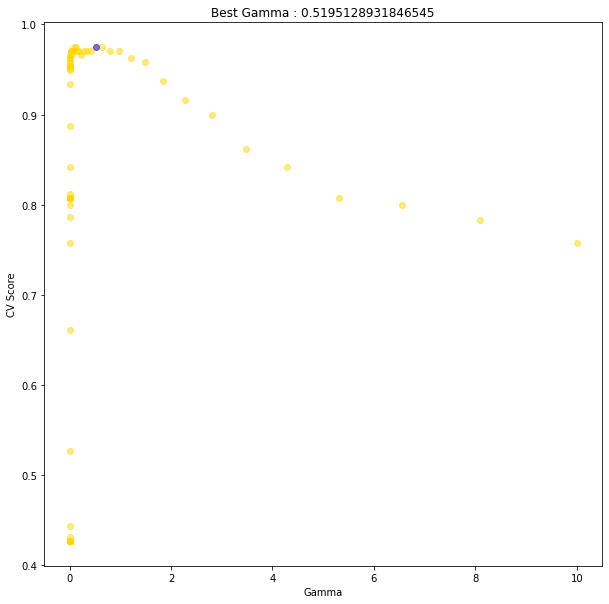

In [31]:
fig, ax = plt.subplots(1, figsize = (10,10))

best_score = 0

for gamma_value in np.logspace(-9, 1, 110):
    # Instance of an SVC model for each iteration of gamma
    SVC_Model = SVC(gamma = gamma_value)
    # Calcualte the Cross Validation score 
    cv_score = cross_val_score(SVC_Model, X_train, y_train, cv = 10).mean()
    # Plot each data point
    ax.scatter(gamma_value, cv_score, color = "gold", alpha = 0.5)
    # Update best_gamma with the value of gamma that produces the highest CV score
    if cv_score > best_score:
        best_gamma = gamma_value 
        best_score = cv_score

# Visualize the best score 
ax.scatter(best_gamma, best_score, color = "blue", alpha = 0.5)
        
l = ax.set(title = "Best Gamma : " + str(best_gamma), 
           xlabel = "Gamma",
           ylabel = "CV Score")

From the scatter plot above, we can see that the best gamma value for SVC model is  around `0.5195`. Thus, we will choose this as the parameter (gamma) value to train our model. Finally, we fit our model using our new value.

In [32]:
# Test the data with the best gamma value
S1 = SVC(gamma = best_gamma)
S1.fit(X_train, y_train)
S1.score(X_train, y_train), S1.score(X_test, y_test)

(0.9916317991631799, 0.9902912621359223)

The scores on both the test and train set are exceptionally high at approximately 99% accuracy. As with the decision tree model we are now interested in identifying and evaluating our mistakes.

#### (2) Evaluating mistakes

Recall the tool from `sklearn.metrics` called `consufion_matrix`. We use this to visualize the mistakes.

In [33]:
#set up confusion model
S1.fit(X_train, y_train)
y2_test_pred = S1.predict(X_test)
c2 = confusion_matrix(y_test, y2_test_pred)
print(c2)

#find the mistakes, 
#and choose some right example to compare
mistakes2 = X_test[y_test != y2_test_pred]
mistake2_labels = y_test[y_test != y2_test_pred]
mistake2_preds = y2_test_pred[y_test != y2_test_pred]

#print them out with dict method 

print("")
print("Mistakes: " + str(len(mistakes2)))
print("")
#use for loop to show the mistakes table
for i in range(len(mistakes2)):
    print(i+1)
    print("Predict: " + str(species_dict[mistake2_preds[i]]) + 
          ", True: " + str(species_dict[mistake2_labels[i]]))
    for j in range(len(test_labels)-1):
        print(str(test_labels[j]) + ": " + str(mistakes2[i, j]))
    print(str(test_labels[2]) + ": " + str(island_dict[mistakes2[i, 2]]))
    print("-------------------------")
    print("")

[[49  0  0]
 [ 1 22  0]
 [ 0  0 31]]

Mistakes: 1

1
Predict: Adelie, True: Chinstrap
Culmen Length (mm): 58.0
Culmen Depth (mm): 17.8
Island: Dream
-------------------------



This time there is only one mistake and our model incorrectly predicts a Chinstrap on Dream as an Adelie. Let's recall the data of Chinstraps and Adelie:

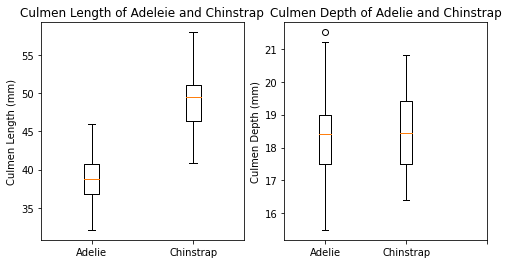

In [34]:
fig_mistake2, ax = plt.subplots(1,2, figsize = (8,4))
# Adelie Culmen measurements
Adelie_cl1 = data[data["Species"] == "Adelie"]["Culmen Length (mm)"].values
Adelie_cd1 = data[data["Species"] == "Adelie"]["Culmen Depth (mm)"].values
# Chinstrap Culmen measurements
Chinstrap_cl1 = data[data["Species"] == "Chinstrap"]["Culmen Length (mm)"].values
Chinstrap_cd1 = data[data["Species"] == "Chinstrap"]["Culmen Depth (mm)"].values
# Aggregate lists
data_cl1 = [Adelie_cl1, Chinstrap_cl1]
data_cd1 = [Adelie_cd1, Chinstrap_cd1]
# Plot a boxplot for length
l = ax[0].boxplot(data_cl1)
l = ax[0].set(ylabel = "Culmen Length (mm)", title = "Culmen Length of Adeleie and Chinstrap")
l = ax[0].set_xticks([1,2])
l = ax[0].set_xticklabels(["Adelie", "Chinstrap"])
# Plot a boxplot for depth
k = ax[1].boxplot(data_cd1)
k = ax[1].set(ylabel = "Culmen Depth (mm)", title = "Culmen Depth of Adelie and Chinstrap")
k = ax[1].set_xticks([1,2,3])
k = ax[1].set_xticklabels(["Adelie", "Chinstrap"])

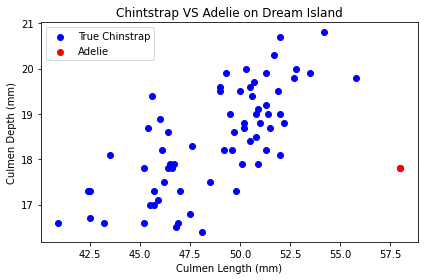

In [35]:
# scatter the true data and mistakes together to compare.
Chinstrap_Dream_data = penguins[(penguins["Species"] == "Chinstrap") & (penguins["Island"] == "Dream")]

fig, ax = plt.subplots(1)
plt.tight_layout()

ax.scatter(Chinstrap_Dream_data["Culmen Length (mm)"], Chinstrap_Dream_data["Culmen Depth (mm)"], color = "blue", label = "True Chinstrap")
ax.scatter(58.0, 17.8, color = "red", label = "Adelie")
ax.set(title = "Chintstrap VS Adelie on Dream Island", xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")
ax.legend()

fig.tight_layout()

1. It appears that the model considered a Chinstrap penguin with an unusually long culmen of 58 mm and a culmen depth of 17.8 mm that falls within the 2nd and 3rd quantile of an Adelie as an Adelie penguin. Furthermore, as seen in the scatter plot the mistake seems to deviate from the center of the data of other Chinstraps. However, based on its culmen length it does not appear to look like an Adelie. This mistake is not intuitive, but similar to the Deicisoin Tree model, the SVC model makes a mistake on a penguin with unusual measurements.

#### (3) Plotting the deciscion regions

Recall the same method `plot_decision_regions()`, let's check how the SVC model classifies the data.

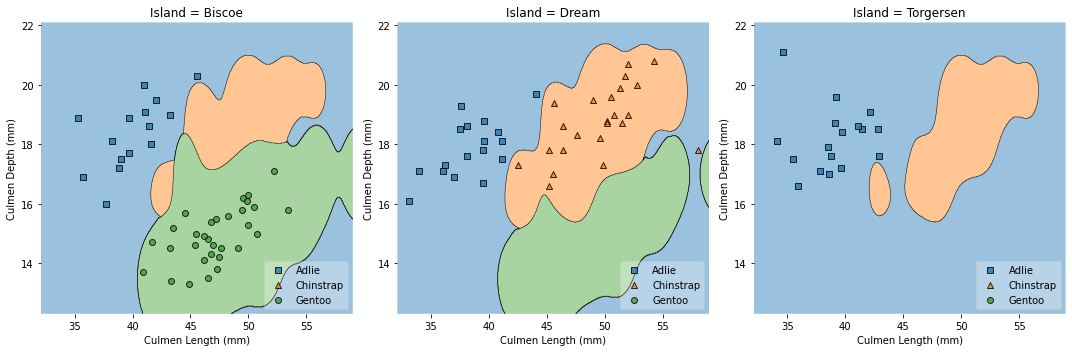

In [36]:
# Create figure and plots
fig, ax = plt.subplots(1,3, figsize = (15,5),sharex = True, sharey = True)

# Values for each island
values = [0, 1.0, 2.0]
width = 0.75

#Plot decision regions
for i in range(len(values)):
    plot_decision_regions(X_test, y_test, clf = S1,
                          filler_feature_values = {2: values[i]},
                          filler_feature_ranges = {2: width},
                          ax = ax[i])
    ax[i].set_xlabel('Culmen Length (mm)')
    ax[i].set_ylabel('Culmen Depth (mm)')
    ax[i].set_title('Island = ' + str(island_dict[values[i]]))
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, ['Adlie', 'Chinstrap', 'Gentoo'], framealpha=0.3, loc=4)
    
fig.tight_layout()

One mistake on the Dream plot.

### III. Multinomial Logistic Regression 

A `Multinomial Logistic Regression` is a kind of `linear model` with more than two possible discrete outcomes. 


We learned some information about Multinomial Logistic Regressions [here]( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). We gathered that in simple terms, Multinomial Logistic Regressions are used to predict categorical placement or classification of a dependent variable based on multiple independent variables. This is precisely what we want to achieve.

Similar to the two models above, we adjust a parameter to optimize our model's performance. For Multinomial Logistic Regressions this parameter will be `C`, the inverse regularization strength. We test the default value for `C` which is 1.0.  

In [37]:
from sklearn.linear_model import LogisticRegression
# Train and evaluate an SVC model with gamma set to scale
L = LogisticRegression(C = 1.0, solver = "newton-cg", multi_class = "multinomial")
L.fit(X_train, y_train)
L.score(X_train, y_train), L.score(X_test, y_test)

(0.9748953974895398, 0.9902912621359223)

This time, the train score is lower than the test score, which means the model has performed better on the test set than train set. Let's train the model with smaller a `C`.

In [38]:
L = LogisticRegression(C = 0.01, solver = "newton-cg", multi_class = "multinomial")
L.fit(X_train, y_train)
L.score(X_train, y_train), L.score(X_test, y_test)

(0.9372384937238494, 0.9514563106796117)

This time the scores go down! To find the "best" `C`, we again use the `Cross-Validation` method.

#### (1) Cross-Validation

[Text(0, 0.5, 'CV Score'), Text(0.5, 0, 'C'), Text(0.5, 1.0, 'Best C : 0.094')]

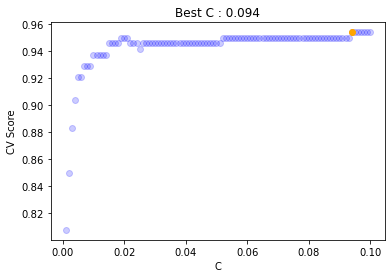

In [39]:
#set up the fig and ax
fig2, ax2 = plt.subplots(1)

#set up the default value for score and depth
best_m_score = 0

#using for loop to find the best depth
for c in np.arange(0.001, 0.101, 0.001):
    m = LogisticRegression(C = c, solver = "newton-cg", multi_class = "multinomial")
    m.fit(X_train, y_train)
    cv_score = cross_val_score(m, X_train, y_train, cv=10).mean()
    ax2.scatter(c, cv_score, color = "blue", alpha = 0.2)
    if cv_score > best_m_score:
        best_c = c
        best_m_score = cv_score
        
ax2.scatter(best_c, best_m_score, color = "orange")        
        
ax2.set(title = "Best C : " + str(best_c),
        xlabel = "C",
        ylabel = "CV Score")

From cross-validation the best value for `C` is 0.094. Let's use it to fit a `LogisticRegression` model and see how it performs.

In [40]:
M1 = LogisticRegression(C = best_c, solver = "newton-cg", multi_class = "multinomial")
M1.fit(X_train, y_train)
M1.score(X_train, y_train), M1.score(X_test, y_test)

(0.9539748953974896, 0.9805825242718447)

This time the train and test scores have decreased slightly compared to the default value so let's use our default value and evalute the model's mistakes.

#### (2) Evaluating mistakes

Recall the `confusion matrix`: 

In [41]:
#set up confusion model
M2 = LogisticRegression(C = 1.0, solver = "newton-cg", multi_class = "multinomial")
M2.fit(X_train, y_train)
M2.fit(X_train, y_train)
y3_test_pred = M2.predict(X_test)
c3 = confusion_matrix(y_test, y3_test_pred)
print(c3)

#find the mistakes, 
#and choose some right example to compare
mistakes3 = X_test[y_test != y3_test_pred]
mistake3_labels = y_test[y_test != y3_test_pred]
mistake3_preds = y3_test_pred[y_test != y3_test_pred]

#print them out with dict method 

print("")
print("Mistakes: " + str(len(mistakes3)))
print("")
#use for loop to show the mistakes table
for i in range(len(mistakes3)):
    print(i+1)
    print("Predict: " + str(species_dict[mistake3_preds[i]]) + 
          ", True: " + str(species_dict[mistake3_labels[i]]))
    for j in range(len(test_labels)-1):
        print(str(test_labels[j]) + ": " + str(mistakes3[i, j]))
    print(str(test_labels[2]) + ": " + str(island_dict[mistakes3[i, 2]]))
    print("-------------------------")
    print("")

[[49  0  0]
 [ 1 22  0]
 [ 0  0 31]]

Mistakes: 1

1
Predict: Adelie, True: Chinstrap
Culmen Length (mm): 42.5
Culmen Depth (mm): 17.3
Island: Dream
-------------------------



The Logistic Regression model makes one mistake on a Chinstrap penguin which it predicts as an Adelie. This is similar to the mistake made by our Multinomial Logistic Regression model. Let's recall the data of Chinstraps and Adelie to understand where the mistkae might have come from.

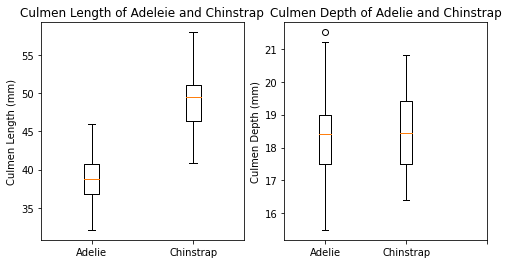

In [42]:
fig_mistake2

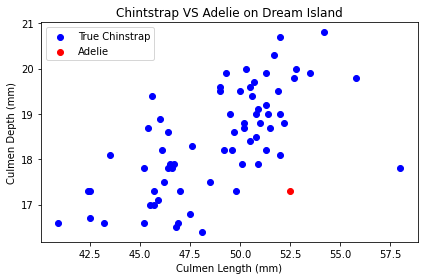

In [43]:
# scatter the true data and mistakes together to compare.
Chinstrap_Dream_data = penguins[(penguins["Species"] == "Chinstrap") & (penguins["Island"] == "Dream")]

fig, ax = plt.subplots(1)
plt.tight_layout()

ax.scatter(Chinstrap_Dream_data["Culmen Length (mm)"], Chinstrap_Dream_data["Culmen Depth (mm)"], color = "blue", label = "True Chinstrap")
ax.scatter(52.5, 17.3, color = "red", label = "Adelie")
ax.set(title = "Chintstrap VS Adelie on Dream Island", xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")
ax.legend()

fig.tight_layout()

4. It can be seen in the box plots that the depth of the Chinstrap is right under the 2nd quartile for both species, but it has a short culmen that fits within the upper quartile of Adleie culmen lengths. This Chinstrap penguin has measurements that can be easily mistaken for an Adelie so this is an intuitive mistake.

#### (3) Plotting the decision regions

Re-use the `plot_decision_region()` method to check how the model classfy the data into different species:

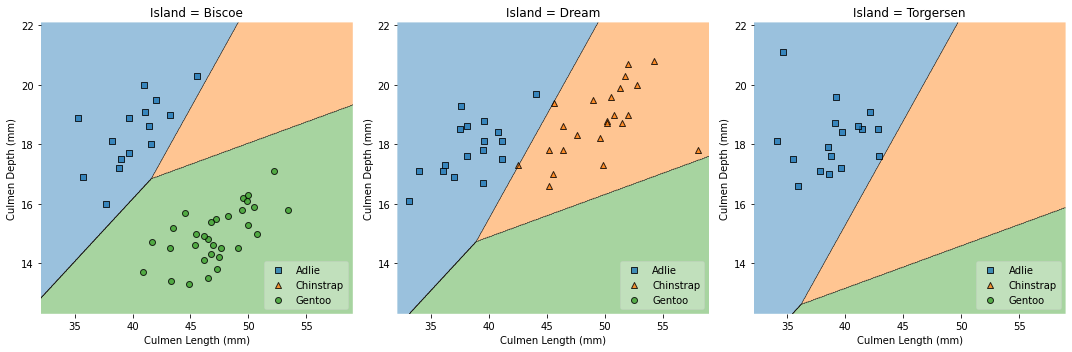

In [44]:
# Create figure and plots
fig, ax = plt.subplots(1,3, figsize = (15,5),sharex = True, sharey = True)

# Values for each island
values = [0, 1.0, 2.0]
width = 0.75

#Plot decision regions
for i in range(len(values)):
    plot_decision_regions(X_test, y_test, clf = M2,
                          filler_feature_values = {2: values[i]},
                          filler_feature_ranges = {2: width},
                          ax = ax[i])
    ax[i].set_xlabel('Culmen Length (mm)')
    ax[i].set_ylabel('Culmen Depth (mm)')
    ax[i].set_title('Island = ' + str(island_dict[values[i]]))
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, ['Adlie', 'Chinstrap', 'Gentoo'], framealpha=0.3, loc=4)
    
fig.tight_layout()

The plots match the confusion matrix since there is only one mistake as we can see on the Dream plot.

## Discussion

The findings in our analysis suggests that the best models are the SVC and Multinomial Logistic Regression using Island, Culmen length, and Culmen depth as our features when predicting penguin species. With their respective parameters of gamma = 0.5195 and C = 1.0 being selected and optimized and then trained on 70% of the data, they both had an accuracy of approximately 99% on the test data; they had only one mistake on our test data while the decision tree model had two. 

One surprising result is that of the four mistake our models had, three were between Adelies and Chinstraps on Dream Island, and the fourth mistake predicted a species of which none were on the island our data was for. Intuitively this is the first thing we would check, "oh this penguin is from Biscoe, so it must be either an Adlie or Gentoo" and we would never guess Chinstrap, however we see the desicion tree make this error. When we look at the visualization of the desicions the Decision Tree makes, the first one is based on culmen length, and if the penguin's culmen length is less than or equal to 42.35 mm the penguin continues on the left half of the tree, and no successive desicion on the left half of the tree looks at Island. This explains how our Gentoo Penguin with a culmen length of 41.7 mm ended up classified as a Chinstrap when they live on entirely different Islands. When the culmen length is less than 42.35 mm the decision tree puts more stock in the quantitative features of culmen length and culmen depth over the categorical Island. We can assume the other models had a similar process where certain features were weighed more than others, impacting the decisions.

With more data we can better fine tune our thresholds and predictors, but we could also run into the issue of species having more outliers or overlapping. The more clumped our data is the easier it is to predict, but we also run the chance of overlap occuring between species, meaning we would have to reevaluate which features we implemented. With our current features, the accuracy would likely go down. Furthermore, increased data could reinforce our model confirming the significance of the islands penguins are from, their culmen length, and culmen depth. 

One of the biggest danger in using these models is the existence of outliers of a species. The closer a penguin is to the mean of its species in regards to its measurements and characteristics, the more likely it is to be correctly predidicted. Our models are efficient at predicting data close to what we have seen, but penguins with the most variance are at risk of getting incorrectly predicted. Another danger is that we simply accepted the data with questioning the data collection process and where it came from. The data collection process should always be closely considered and evaluated. If over time the populations change or migrate between islands, the means and distributions could change rendering our data to be unhelpful in making predictions. If this happened we would potentially have to reslect our features. Our model is also specific to each island so they would be inaccurate for populations of penguins found elsewhere. 